# Movie recommendation system : Content based

In [ ]:
# Import libraries

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_credit = pd.read_csv('data/tmdb_5000_credits.csv')

In [3]:
df_movies = pd.read_csv('data/tmdb_5000_movies.csv')

In [4]:
#get movie data of year 2018-2022

In [5]:
df_movies_2022 = pd.read_csv('data/movie_2022.csv')

In [6]:
df_movies_2022.drop(['Unnamed: 0','Cast and crew'], axis=1, inplace=True)

In [7]:
df_movies_2022.head()

,Title,director,cast_crew,genres,id
0,Underworld: Blood Wars,Anna Foerster,"Kate Beckinsale, Theo James, Lara Pulver, Jam...",Fantasy Action Thriller Horror,346672
1,Arsenal,Steven C. Miller,"Adrian Grenier, Johnathon Schaech, Nicolas Ca...",Thriller,388202
2,Between Us,Rafael Palacio Illingworth,"Olivia Thirlby, Ben Feldman, Adam Goldberg, A...",Romance Adventure Drama,290512
3,Monster Trucks,Chris Wedge,"Lucas Till, Jane Levy, Amy Ryan, Holt McCalla...",Action Comedy Science Fiction,262841
4,The Bye Bye Man,Stacy Title,"Douglas Smith, Doug Jones, Michael Trucco, Cr...",Horror Thriller,292280


In [8]:
df_movies_2022.isnull().sum()

Title        0
director     0
cast_crew    9
genres       0
id           0
dtype: int64

In [9]:
#documentry movies has no crew 
df_movies_2022[df_movies_2022['cast_crew'].isnull()]

,Title,director,cast_crew,genres,id
99,Buena Vista Social Club: Adios,Lucy Walker,NaN,Documentary Music,432605
154,Served Like A Girl,Lysa Heslov,NaN,Documentary,438447
440,Fahrenheit 11/9,Michael Moore,NaN,Documentary,532908
450,The Great Buster: A Celebration,Peter Bogdanovich,NaN,Documentary,539199
688,Wrinkles the Clown,Michael Beach Nichols,NaN,Documentary,619262
1205,Ailey,Jamila Wignot,NaN,Documentary,776519
1214,Enemies of the State,Sonia Kennebeck,NaN,Documentary,698495
1221,Homeroom,Peter Nicks,NaN,Documentary,776523
1227,Not Going Quietly,Nicholas Bruckman,NaN,Documentary,736117


In [10]:
flt =(df_movies_2022['cast_crew'].isnull())
df_movies_2022.loc[flt,'cast_crew'] = df_movies_2022.loc[flt,'cast_crew'].fillna('no_crew')


In [11]:
df_movies_2022.isnull().sum()

Title        0
director     0
cast_crew    0
genres       0
id           0
dtype: int64

In [12]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [13]:
df_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [14]:
df_movies = df_movies.dropna(subset=['release_date'])


In [15]:
df_movies = df_movies.reset_index(drop=True)

In [16]:

df_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4798,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4799,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [17]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [18]:
df_movies['year']=df_movies['release_date'].apply(lambda x : int(x.year))
df_movies['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4797    1992
4798    2011
4799    2013
4800    2012
4801    2005
Name: year, Length: 4802, dtype: int64

<AxesSubplot:>

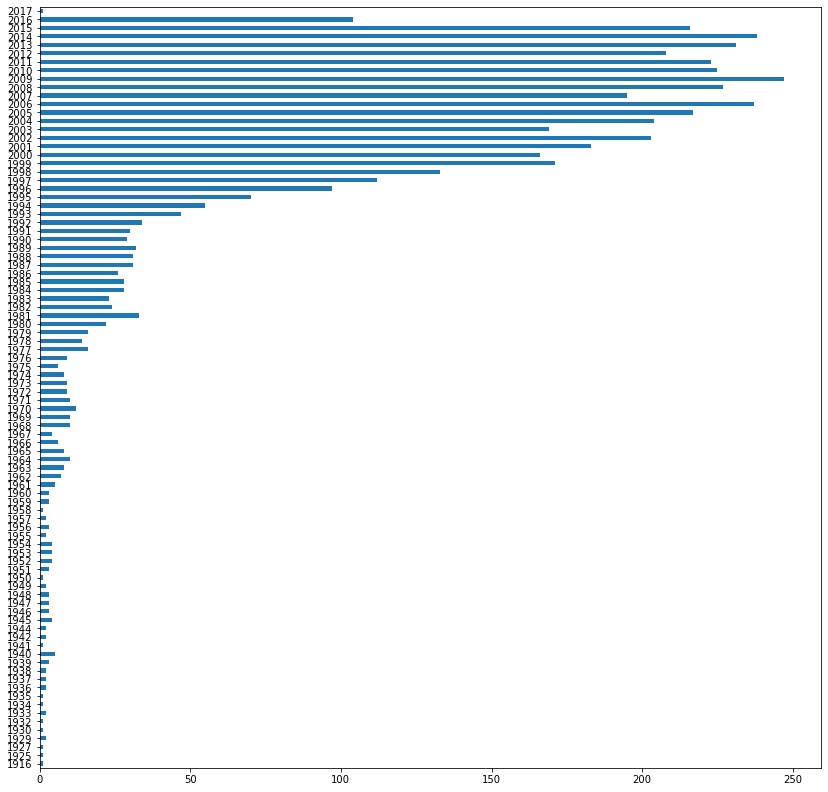

In [19]:
plt.figure(figsize=(14,14))
df_movies['year'].value_counts().sort_index().plot(kind='barh')

In [20]:
#we have data only till 2016

In [21]:
df_movies = df_movies.merge(df_credit, on='title')

In [22]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,year,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
final_df = df_movies[['genres','id','keywords','title','overview','cast','crew']]

In [24]:
final_df.isnull().sum()

genres      0
id          0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [25]:
final_df = final_df.dropna()

In [26]:
final_df

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4803,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4804,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4805,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4806,[],126186,[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [27]:
final_df = final_df.reset_index(drop=True)

In [28]:
final_df

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4800,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4801,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4802,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4803,[],126186,[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [29]:
# sub = [[i for i in j.split('"') if i.isalpha() and 'id' not in i and 'name' not in i ] for j in df_movies['genres']]

In [30]:
import ast

In [31]:
def list_genres(obj):
    lst = []
    for i in ast.literal_eval(obj):
        lst.append(i['name'])
    return(lst)

In [32]:
final_df['genres'] = final_df['genres'].apply(list_genres)

In [33]:
final_df['keywords'] = final_df['keywords'].apply(list_genres)

In [34]:
def list_cast(obj):
    lst = []
    j = 0
    for i in ast.literal_eval(obj):
        j += 1
        if j<=3:
            lst.append(i['name'])
        else:
            break
    return(lst)

In [35]:
final_df['cast'] = final_df['cast'].apply(list_cast)

In [36]:
final_df

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4800,"[Action, Crime, Thriller]",9367,"[united states–mexico barrier, legs, arms, pap...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4801,"[Comedy, Romance]",72766,[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4802,"[Comedy, Drama, Romance, TV Movie]",231617,"[date, love at first sight, narration, investi...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Eric Mabius, Kristin Booth, Crystal Lowe]","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4803,[],126186,[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[Daniel Henney, Eliza Coupe, Bill Paxton]","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [37]:
def list_crew(obj):
    lst = ast.literal_eval(obj)
    name_dir = [i['name'] for i in lst if i['job']=='Director']
    return(name_dir)

In [38]:
final_df['crew'] = final_df['crew'].apply(list_crew)

In [39]:
final_df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [40]:
# df_movies_2022['genres'].apply(list_genres)

In [41]:
final_df['overview'] = final_df['overview'].str.split()

In [42]:
final_df['overview']

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4800    [El, Mariachi, just, wants, to, play, his, gui...
4801    [A, newlywed, couple's, honeymoon, is, upended...
4802    ["Signed,, Sealed,, Delivered", introduces, a,...
4803    [When, ambitious, New, York, attorney, Sam, is...
4804    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4805, dtype: object

In [43]:
# final_df['genres'] = [[i.replace(' ','') for i in j]for j in final_df['genres']]
final_df['genres']= final_df['genres'].apply(lambda x: [i.replace(' ','') for i in x])

In [44]:
final_df['keywords']= final_df['keywords'].apply(lambda x: [i.replace(' ','') for i in x])

In [45]:
final_df['cast']= final_df['cast'].apply(lambda x: [i.replace(' ','') for i in x])
final_df['crew']= final_df['crew'].apply(lambda x: [i.replace(' ','') for i in x])

In [46]:
final_df['tag'] = final_df['genres'] + final_df['keywords'] +  final_df['overview'] + final_df['cast'] + final_df['crew']

In [47]:
# movie_df = final_df[['id','title','tag']]
new = final_df.drop(columns=['overview','genres','keywords','cast','crew'])

In [48]:
new['tag']

0       [Action, Adventure, Fantasy, ScienceFiction, c...
1       [Adventure, Fantasy, Action, ocean, drugabuse,...
2       [Action, Adventure, Crime, spy, basedonnovel, ...
3       [Action, Crime, Drama, Thriller, dccomics, cri...
4       [Action, Adventure, ScienceFiction, basedonnov...
                              ...                        
4800    [Action, Crime, Thriller, unitedstates–mexicob...
4801    [Comedy, Romance, A, newlywed, couple's, honey...
4802    [Comedy, Drama, Romance, TVMovie, date, loveat...
4803    [When, ambitious, New, York, attorney, Sam, is...
4804    [Documentary, obsession, camcorder, crush, dre...
Name: tag, Length: 4805, dtype: object

In [49]:
df_movies_2022.dtypes

Title        object
director     object
cast_crew    object
genres       object
id            int64
dtype: object

In [50]:
df_movies_2022['cast_crew'] = df_movies_2022['cast_crew'].str.replace(' ','')

In [51]:
df_movies_2022['director'] = df_movies_2022['director'].replace(' ','')

In [52]:
df_movies_2022['cast_crew'] = df_movies_2022['cast_crew'].str.replace(',',' ')


In [53]:
df_movies_2022.head()

,Title,director,cast_crew,genres,id
0,Underworld: Blood Wars,Anna Foerster,KateBeckinsale TheoJames LaraPulver JamesFaulk...,Fantasy Action Thriller Horror,346672
1,Arsenal,Steven C. Miller,AdrianGrenier JohnathonSchaech NicolasCage Lyd...,Thriller,388202
2,Between Us,Rafael Palacio Illingworth,OliviaThirlby BenFeldman AdamGoldberg Analeigh...,Romance Adventure Drama,290512
3,Monster Trucks,Chris Wedge,LucasTill JaneLevy AmyRyan HoltMcCallany RobLo...,Action Comedy Science Fiction,262841
4,The Bye Bye Man,Stacy Title,DouglasSmith DougJones MichaelTrucco CressidaB...,Horror Thriller,292280


In [54]:
df_movies_2022['tag'] = df_movies_2022.apply(lambda row : str(row['cast_crew']) + ' '+ row['genres'] + ' '+ row['director'] , axis=1)

In [55]:
df_movies_2022

,Title,director,cast_crew,genres,id,tag
0,Underworld: Blood Wars,Anna Foerster,KateBeckinsale TheoJames LaraPulver JamesFaulk...,Fantasy Action Thriller Horror,346672,KateBeckinsale TheoJames LaraPulver JamesFaulk...
1,Arsenal,Steven C. Miller,AdrianGrenier JohnathonSchaech NicolasCage Lyd...,Thriller,388202,AdrianGrenier JohnathonSchaech NicolasCage Lyd...
2,Between Us,Rafael Palacio Illingworth,OliviaThirlby BenFeldman AdamGoldberg Analeigh...,Romance Adventure Drama,290512,OliviaThirlby BenFeldman AdamGoldberg Analeigh...
3,Monster Trucks,Chris Wedge,LucasTill JaneLevy AmyRyan HoltMcCallany RobLo...,Action Comedy Science Fiction,262841,LucasTill JaneLevy AmyRyan HoltMcCallany RobLo...
4,The Bye Bye Man,Stacy Title,DouglasSmith DougJones MichaelTrucco CressidaB...,Horror Thriller,292280,DouglasSmith DougJones MichaelTrucco CressidaB...
...,...,...,...,...,...,...
1667,I Wanna Dance with Somebody,Kasi Lemmons,NaomiAckie AshtonSanders StanleyTucci,Drama History,696157,NaomiAckie AshtonSanders StanleyTucci Drama Hi...
1668,Wildcat,"Melissa Lesh, Trevor Frost",MelissaLesh,Drama Thriller War,762735,"MelissaLesh Drama Thriller War Melissa Lesh, T..."
1669,Glass Onion: A Knives Out Mystery,Rian Johnson,DanielCraig EdwardNorton JanelleMonáe KathrynH...,Comedy Crime Mystery,661374,DanielCraig EdwardNorton JanelleMonáe KathrynH...
1670,The Pale Blue Eye,Scott Cooper,ChristianBale HarryMelling GillianAnderson Luc...,Crime Thriller Mystery Horror,800815,ChristianBale HarryMelling GillianAnderson Luc...


In [56]:
df_movies_2022.rename(columns={'Title':'title'}, inplace=True)

In [57]:
df_movies_2022= df_movies_2022[['id','title','tag']]

In [58]:

new['tag'] = new['tag'].apply(lambda x:" ".join(x))

In [59]:
new

,id,title,tag
0,19995,Avatar,Action Adventure Fantasy ScienceFiction cultur...
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drugabuse exoti...
2,206647,Spectre,Action Adventure Crime spy basedonnovel secret...
3,49026,The Dark Knight Rises,Action Crime Drama Thriller dccomics crimefigh...
4,49529,John Carter,Action Adventure ScienceFiction basedonnovel m...
...,...,...,...
4800,9367,El Mariachi,Action Crime Thriller unitedstates–mexicobarri...
4801,72766,Newlyweds,Comedy Romance A newlywed couple's honeymoon i...
4802,231617,"Signed, Sealed, Delivered",Comedy Drama Romance TVMovie date loveatfirsts...
4803,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [60]:
# df_movies_2022

In [61]:
frames = [new,df_movies_2022]

In [62]:
result = pd.concat(frames,ignore_index=True)

In [63]:
# result['tag']
result['tag'] = result['tag'].apply(lambda x : x.lower())

In [64]:
#get the root word for prediction

In [65]:
import nltk

In [66]:
from nltk.stem.porter import PorterStemmer

In [67]:
ps = PorterStemmer()

In [68]:
def get_stem(text):
    ls = []
    text = text.split()
    for i in text:
        ls.append(ps.stem(i))
        
    return(" ".join(ls)) 

In [69]:
lst1 = result['tag'].apply(get_stem)

In [70]:
result['tag'] = lst1

In [71]:
result

,id,title,tag
0,19995,Avatar,action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,action crime drama thriller dccomic crimefight...
4,49529,John Carter,action adventur sciencefict basedonnovel mar m...
...,...,...,...
6472,696157,I Wanna Dance with Somebody,naomiacki ashtonsand stanleytucci drama histor...
6473,762735,Wildcat,"melissalesh drama thriller war melissa lesh, t..."
6474,661374,Glass Onion: A Knives Out Mystery,danielcraig edwardnorton janellemoná kathrynha...
6475,800815,The Pale Blue Eye,christianbal harrymel gilliananderson lucyboyn...


In [72]:
result.to_csv('final_movie_dataset.csv', index=False, header=True)

In [73]:
#CountVectorizer

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
cv = CountVectorizer(max_features=5000, stop_words='english')

In [76]:
vectors = cv.fit_transform(result['tag']).toarray()

In [77]:
vectors.shape

(6477, 5000)

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

In [79]:
similarity = cosine_similarity(vectors)

In [80]:
lst2 = similarity[3]

In [81]:
np.argsort(lst2)

array([5013, 5867, 5869, ...,  428,   65,    3])

In [82]:
def recommend(movie):
    ind = result[result['title']==movie].index[0]
    distances = sorted(list(enumerate(similarity[ind])), key=lambda x:x[1],reverse=True)[:6]
    for i in distances:
        print(result.iloc[i[0]]['title'])
        

In [83]:
recommend('Avatar')

Avatar
Aliens vs Predator: Requiem
Aliens
Independence Day
Falcon Rising
Titan A.E.


In [84]:
recommend('Shanghai Calling')

Shanghai Calling
Killers
Should've Been Romeo
I Am Sam
I Served the King of England
Take Me Home Tonight


In [85]:
recommend('Wildcat')

Wildcat
Rushed
Private Property
American Fable
Kidnap
The Strange Ones


In [86]:
# import pickle

In [87]:
# pickle.dump(new,open('movie.pkl','wb'))

In [88]:
# pickle.dump(similarity,open('similarity.pkl','wb'))

In [89]:
#tfidf Vectorizer

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,2), stop_words='english')

In [92]:
vecs = tfidf.fit_transform(result['tag']).toarray()

In [93]:
tfidf.get_feature_names_out()

array(['000', '007', '10', ..., 'zoo', 'zooeydeschanel', 'zoëkravitz'],
      dtype=object)

In [94]:
#compute the distance among vectors 

In [95]:
from sklearn.metrics.pairwise import cosine_similarity

In [96]:
simi = cosine_similarity(vecs)

In [97]:
simi.shape

(6477, 6477)

In [98]:
simi

array([[1.        , 0.03948723, 0.04371813, ..., 0.        , 0.        ,
        0.04016811],
       [0.03948723, 1.        , 0.01139441, ..., 0.        , 0.        ,
        0.01830342],
       [0.04371813, 0.01139441, 1.        , ..., 0.08913992, 0.01244402,
        0.04239448],
       ...,
       [0.        , 0.        , 0.08913992, ..., 1.        , 0.04887142,
        0.        ],
       [0.        , 0.        , 0.01244402, ..., 0.04887142, 1.        ,
        0.0126221 ],
       [0.04016811, 0.01830342, 0.04239448, ..., 0.        , 0.0126221 ,
        1.        ]])

In [99]:
name = [i for i in result['title'] if 'Harry' in i]
name

['Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Prisoner of Azkaban',
 "Harry Potter and the Philosopher's Stone",
 'Harry Potter and the Chamber of Secrets',
 'Dumb and Dumberer: When Harry Met Lloyd',
 'Deconstructing Harry',
 'When Harry Met Sally...',
 'Harry Brown',
 'The Trouble with Harry']

In [100]:
ind = result[result['title']=='Newlyweds'].index[0]
ind

4801

In [101]:
def get_tfidf_dist(movie):
    ind = result[result['title']==movie].index[0]
    distances = sorted(list(enumerate(simi[ind])), key=lambda x: x[1], reverse=True)[:6]
    for i in distances:
        print(result.iloc[i[0]]['title'])

In [102]:
get_tfidf_dist('Harry Potter and the Chamber of Secrets')

Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Order of the Phoenix
Harry Potter and the Goblet of Fire
Harry Potter and the Philosopher's Stone
Harry Potter and the Half-Blood Prince


In [103]:
recommend('Harry Potter and the Chamber of Secrets')

Harry Potter and the Chamber of Secrets
Harry Potter and the Order of the Phoenix
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Philosopher's Stone
Harry Potter and the Half-Blood Prince


In [104]:
get_tfidf_dist('Wildcat')

Wildcat
Ghosts of War
Black Book
The Killing of Two Lovers
The King's Man
Lone Survivor


In [ ]:
# steps:
# 1. Data Collection: 
#     a. kagglelink :'/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv',
#                     '/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv'
#     b. movie data for year (2018-2022) 'data/movie_2022.csv', which is exported from other notebook 'web_scraping'.
# 2. combine both the movies and credits dataset to get features like cast crew, director and genres into a single 
#    dataframe
# 3. Data Cleaning:
#     a. remove html tags
#     b. remove special characters (get only alphanumeric characters)
#     c. stemming of text to get the root word
# 3.Data preprocessing:
#     a.all the features like cast, crew, director and genres are combined into a single column ‘tag’
#     b.stemming is done on ‘tag’ column text to get the root word
#     c. each text in ‘tag’  column is converted to vectors using sklearn.countvectorizer and TfidfVectorizer
# 4. Training the model:
#      a. now distance between each vector is computed using cosine_similarity to get the similar movies 
#         in terms of cast, crew, director and genres.
# 5. to recommend similar movie distance is sorted in descending order to get top movies